<a href="https://colab.research.google.com/github/keyvanforwork/deep-learning-with-TensorFlow/blob/main/neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification in tensorflow

some type of classifications:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles[:5]

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


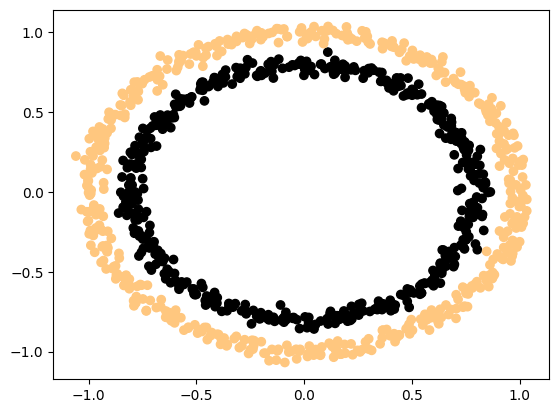

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.copper_r);

In [ ]:
circles['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: label, Length: 1000, dtype: int64>

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(name="model_1")
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 7.0052 - accuracy: 0.4960
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


In [ ]:
# Improve the model by more training longer(more epochs)
model_1.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
# model_2 (with 2 layers)
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential(name="model_2")
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934518218040466, 0.5]

In [ ]:
# model_3 (with 3 layers and adam optimizer)
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(name="model_3")
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.7012 - accuracy: 0.5090


[0.7012109160423279, 0.5090000033378601]

### Define the plot function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boudary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=100),
                       np.linspace(y_min, y_max, num=100))
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Binary classification


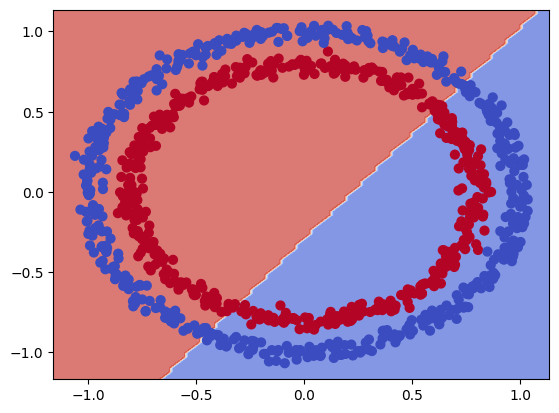

In [ ]:
plot_decision_boudary(model_3,
                      X=X,
                      y=y)

In [ ]:
# tf.random.set_seed(42)

# X_reg = tf.range(0, 1000, 5)
# y_reg = X_reg + 100

# X_reg_train = X_reg[:160]
# X_reg_test = X_reg[160:]
# y_reg_train = y_reg[:160]
# y_reg_test = y_reg[160:]

# model_3.fit(x_reg_train[..., tf.newaxis], y_reg_train, epochs=100, verbose=0)

# model_3.evaluate(x_reg_train[..., tf.newaxis], y_reg_train)

# !!! model_3 is compiling for binary classification

In [ ]:
tf.random.set_seed(42)

# Data
X_reg = tf.range(0, 1000, 5)
y_reg = X_reg + 100

X_reg_train = X_reg[:160]
X_reg_test = X_reg[160:]
y_reg_train = y_reg[:160]
y_reg_test = y_reg[160:]

# 1. Create the model
model_reg_3 = tf.keras.Sequential(name="model_reg_3")
model_reg_3.add(tf.keras.layers.Dense(100))
model_reg_3.add(tf.keras.layers.Dense(10))
model_reg_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_reg_3.compile(loss="mae",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# 3. Fit the model
model_reg_3.fit(X_reg_train[..., tf.newaxis], y_reg_train, epochs=100, verbose=0)

# 4. Evaluate the model
model_reg_3.evaluate(X_reg_train[..., tf.newaxis], y_reg_train)

5/5 [==============================] - 0s 3ms/step - loss: 37.8227 - mae: 37.8227


[37.822731018066406, 37.822731018066406]

2/2 [==============================] - 0s 6ms/step


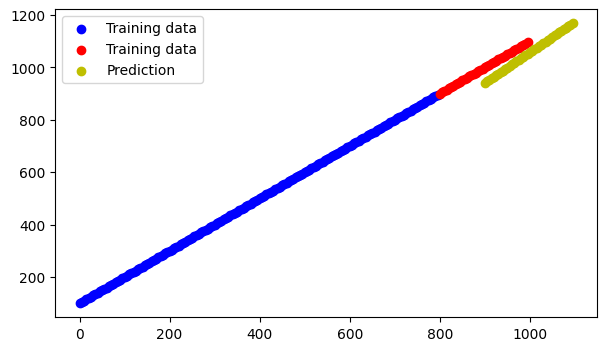

In [ ]:
y_reg_pred = model_reg_3.predict(X_reg_test)

plt.figure(figsize=(7, 4))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="r", label="Training data")
plt.scatter(y_reg_test, y_reg_pred, c="y", label="Prediction")
plt.legend()
plt.show()

### Non-linear

In [ ]:
# model_4 (with linear activations)
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(name="model_4")
model_4.add(tf.keras.layers.Dense(1, activation="linear"))

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7058 - accuracy: 0.4840


[0.7057597637176514, 0.48399999737739563]

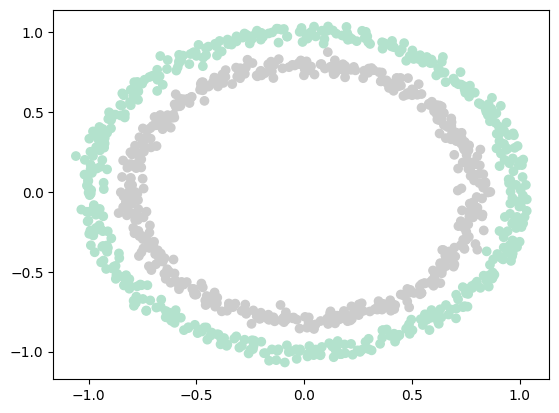

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Pastel2)

313/313 [==============================] - 0s 1ms/step
Binary classification


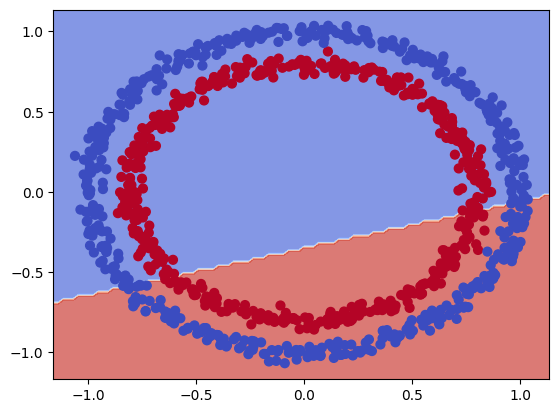

In [ ]:
plot_decision_boudary(model_4,
                      X=X,
                      y=y)

In [ ]:
# model_5 (with non-linear activations)
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential(name="model_5")
model_5.add(tf.keras.layers.Dense(1, activation="relu"))

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7203 - accuracy: 0.4600


[0.720334529876709, 0.46000000834465027]

In [ ]:
# model_6 (with 2 layers , 4 neurons and non-linear activations )
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential(name="model_6")
model_6.add(tf.keras.layers.Dense(4, activation="relu"))
model_6.add(tf.keras.layers.Dense(4, activation="relu"))
model_6.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9750


[0.15796718001365662, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
Binary classification


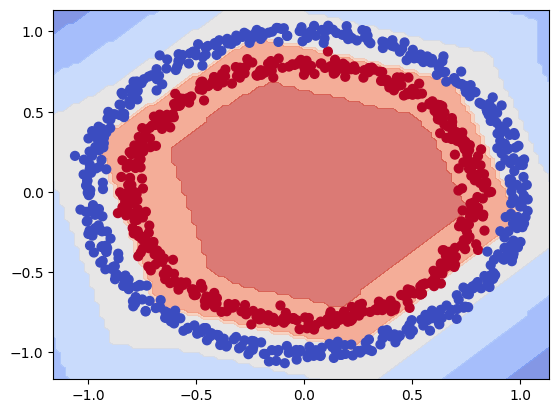

In [ ]:
plot_decision_boudary(model_6,
                      X=X,
                      y=y)

In [ ]:
# model_7 (with 2 layers , 4 neurons , non-linear activations and lr=0.01 )
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential(name="model_7")
model_7.add(tf.keras.layers.Dense(4, activation="relu"))
model_7.add(tf.keras.layers.Dense(4, activation="relu"))
model_7.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9980


[0.010626104660332203, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
Binary classification


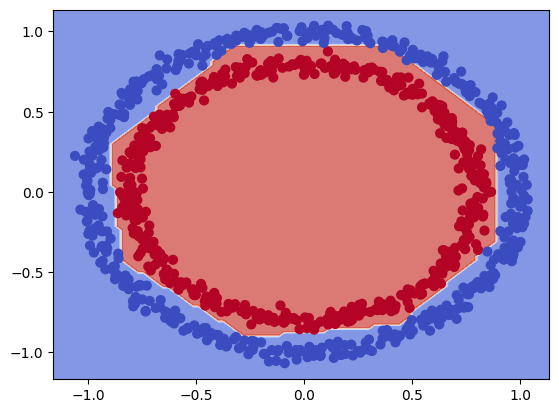

In [ ]:
plot_decision_boudary(model_7,
                      X=X,
                      y=y)

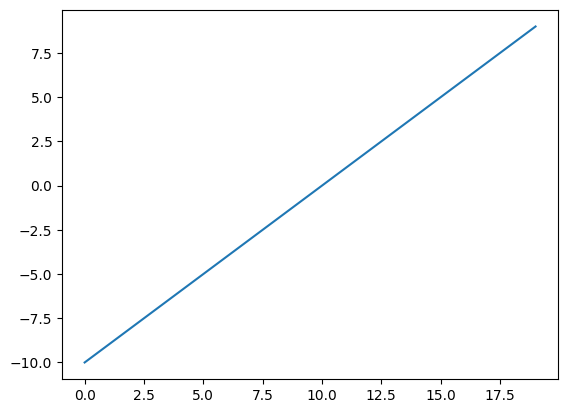

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A);

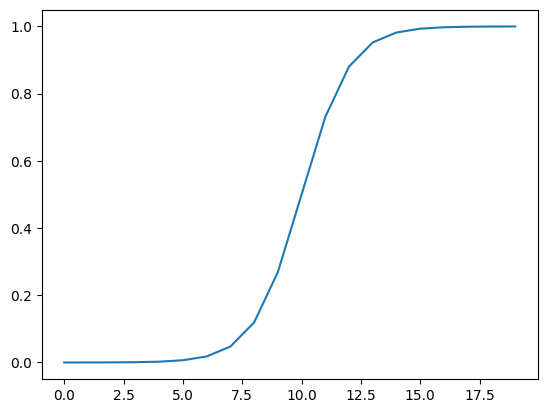

In [ ]:
# Relecate the sigmoid activation function [sigmoid(x) = 1 / (1 + exp(-x))]
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(A));

In [ ]:
# Recreate the relu activation function
def relu(x):
  return tf.maximum(0, tf.cast(x, dtype=tf.float32))

In [ ]:
relu(-12), relu(-6.53), relu(0), relu(2.87), relu(16),

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.87>,
 <tf.Tensor: shape=(), dtype=float32, numpy=16.0>)

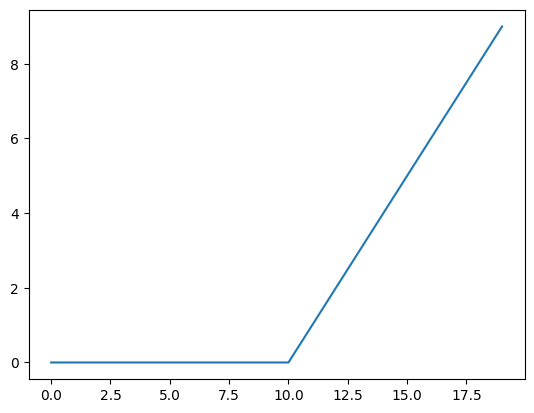

In [ ]:
plt.plot(relu(A));

tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True], shape=(20,), dtype=bool)


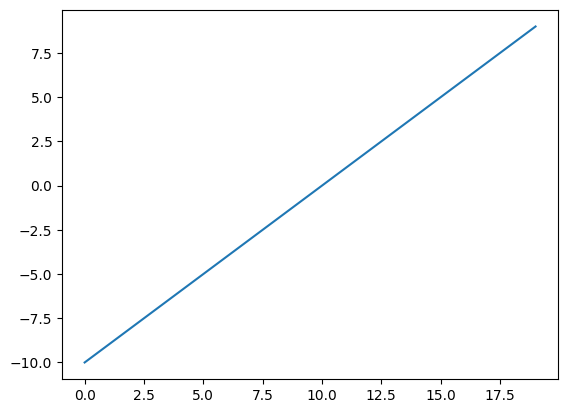

In [ ]:
# Linear activation function
print(A == tf.keras.activations.linear(A))
plt.plot(tf.keras.activations.linear(A));

### Evaluating and improving our classification model

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model_8
# Base on model_7 fit on the training sets and evaluate on the test sets

tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential(name="model_8")
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=30, verbose=0)

# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9850


[0.11428376287221909, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
Binary classification
313/313 [==============================] - 0s 1ms/step
Binary classification


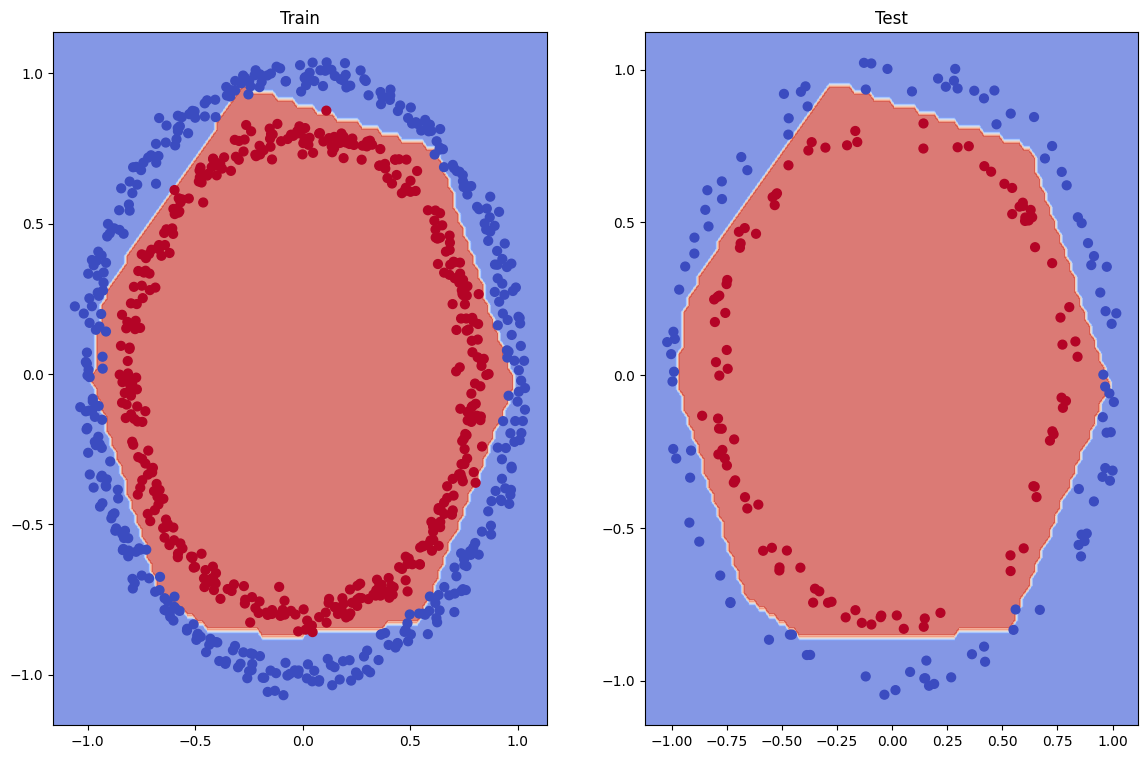

In [ ]:
# Plot the decision boundaries for the trainig and test sets
plt.figure(figsize=(14,9))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boudary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boudary(model_8, X=X_test, y=y_test)
plt.show()

#### History object
return from the fit functions

In [ ]:
# Convert history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.712013,0.47875
1,0.694493,0.48875
2,0.690547,0.50500
3,0.688257,0.51750
4,0.685340,0.56875
5,0.679546,0.55625
6,0.669701,0.67375
7,0.655737,0.70375
8,0.632419,0.72375
9,0.596780,0.76250


Text(0.5, 1.0, 'Loss curves')

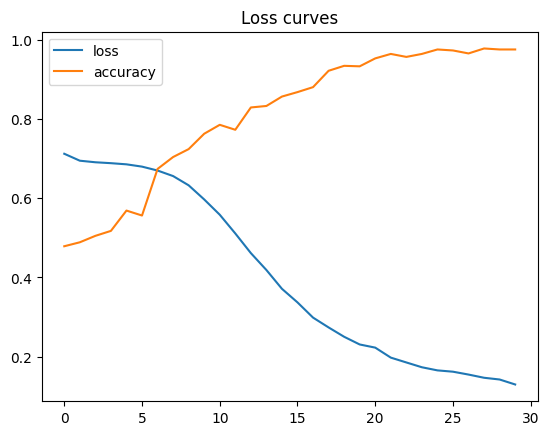

In [ ]:
# Plot the loss curves (for training)
pd.DataFrame(history.history).plot()
plt.title("Loss curves")

In [ ]:
# model_9

tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential(name="model_9")
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs/20))

# 4. Fit the model
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      verbose=0,
                      callbacks=[lr_scheduler])

# 5. Evaluate the model
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4950


[0.6931767463684082, 0.4950000047683716]

#### Find the best learning rate for our model

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.697333,0.50250,0.000100
1,0.697206,0.50500,0.000112
2,0.697070,0.50750,0.000126
3,0.696930,0.50875,0.000141
4,0.696778,0.50875,0.000158
...,...,...,...
95,0.763914,0.48125,5.623413
96,0.795310,0.50125,6.309574
97,0.949177,0.49625,7.079458
98,0.901713,0.49125,7.943282


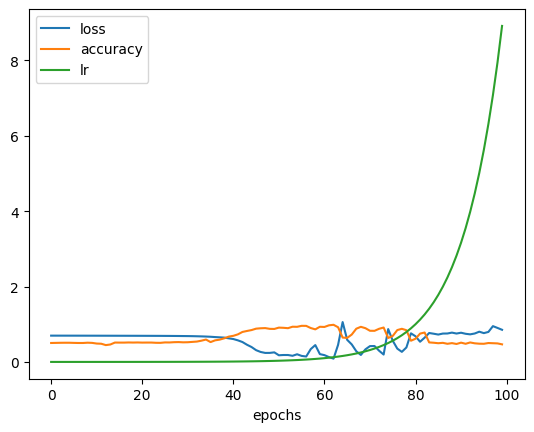

In [ ]:
pd.DataFrame(history.history).plot(xlabel="epochs");

In [ ]:
lrs = 1e-4 * 10 ** (tf.range(100)/20)
len(lrs)

100

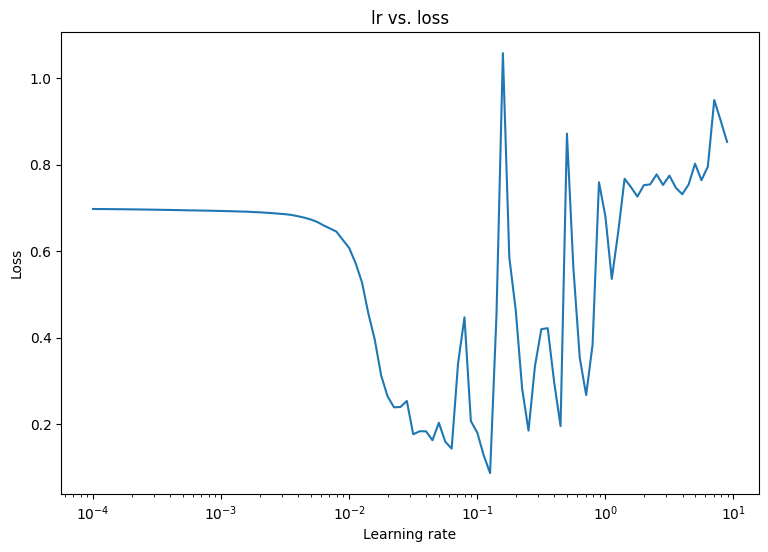

In [ ]:
plt.figure(figsize=(9, 6))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("lr vs. loss")
plt.show()

In [ ]:
# Typical learning rate
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# model_10
# With the ideal learning rate and less epochs

tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential(name="model_10")
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. Fit the model
history = model_10.fit(X_train, y_train, epochs=20, verbose=0)

# 4. Evaluate the model
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9700


[0.11880363523960114, 0.9700000286102295]

313/313 [==============================] - 1s 2ms/step
Binary classification
313/313 [==============================] - 0s 1ms/step
Binary classification


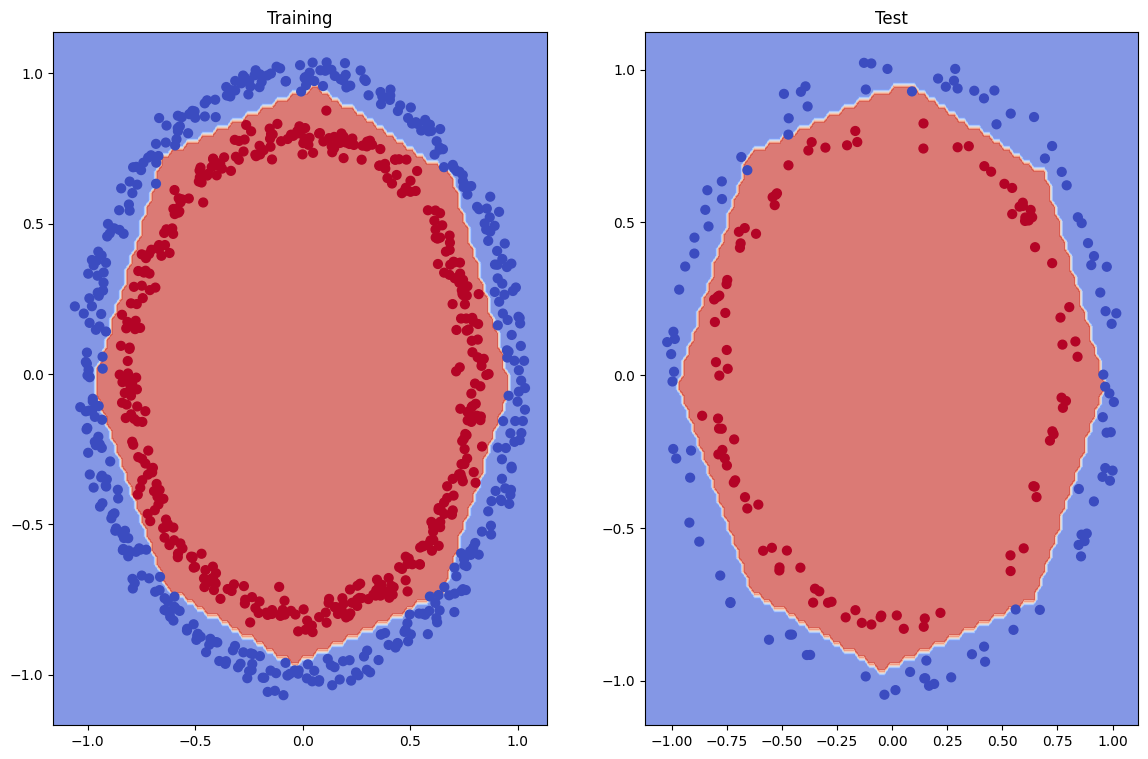

In [ ]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(14, 9))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boudary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boudary(model_10, X=X_test, y=y_test)
plt.show()

#### More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (Scikit-learn)

In [ ]:
# Accuracy
loss, accuracy = model_10.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9700


(0.11880363523960114, 0.9700000286102295)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = tf.round(model_10.predict(X_test))
y_true = y_test
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat

7/7 [==============================] - 0s 2ms/step


array([[96,  5],
       [ 1, 98]])

In [ ]:
type(conf_mat), conf_mat.dtype

(numpy.ndarray, dtype('int64'))

In [ ]:
y_test[:10], y_pred[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32)>)

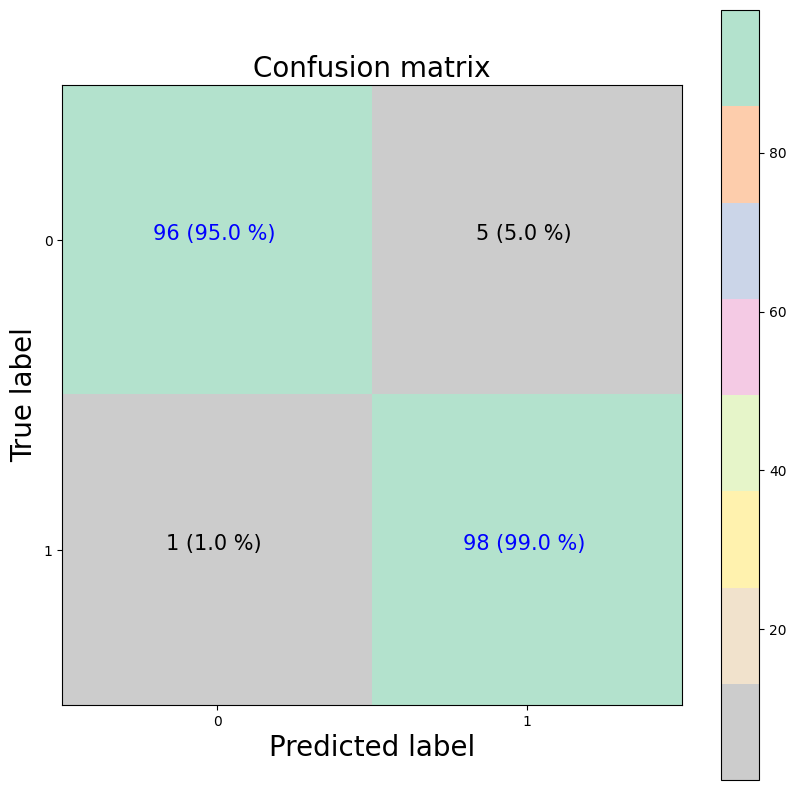

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

conf_mat = confusion_matrix(y_true, y_pred)
conf_mat_norm = conf_mat.astype("float") / conf_mat.sum(axis=1)[:, tf.newaxis] # normalize the conf_mat
n_classes = conf_mat.shape[0]

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(conf_mat, cmap=plt.cm.Pastel2_r)
fig.colorbar(cax)

classes = False  # for binary is False and for multiclass is True

if classes:
  labels = classes
else:
  labels = np.arange(conf_mat.shape[0])

ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (conf_mat.max() + conf_mat.min()) / 2.0

for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
  plt.text(j, i, f"{conf_mat[i, j]} ({conf_mat_norm[i, j]*100:.1f} %) ",
           horizontalalignment="center",
           color="blue" if conf_mat[i, j] > threshold else "black",
           size=15)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes=None,figsize=(10, 10), text_size=20):
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  conf_mat = confusion_matrix(y_true, y_pred)
  conf_mat_norm = conf_mat.astype("float") / conf_mat.sum(axis=1)[:, tf.newaxis] # normalize the conf_mat
  n_classes = conf_mat.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # classes = False  # for binary is False and for multiclass is True

  if classes:
    labels = classes
  else:
    labels = np.arange(conf_mat.shape[0])

  ax.set(title="Confusion matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (conf_mat.max() + conf_mat.min()) / 2.0

  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, f"{conf_mat[i, j]} ({conf_mat_norm[i, j]*100:.1f} %) ",
            horizontalalignment="center",
            color="#00CCCC" if conf_mat[i, j] > threshold else "#2D2D2D",
            size=text_size)

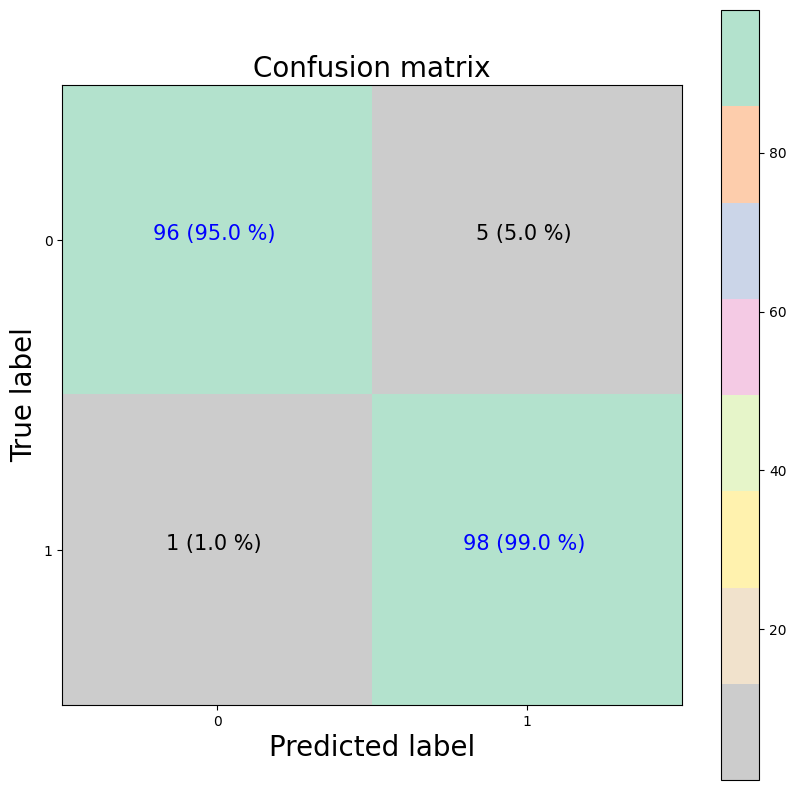

In [ ]:
plot_confusion_matrix(y_true=y_test, y_pred=y_pred)

## Multiclass classification

In [ ]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

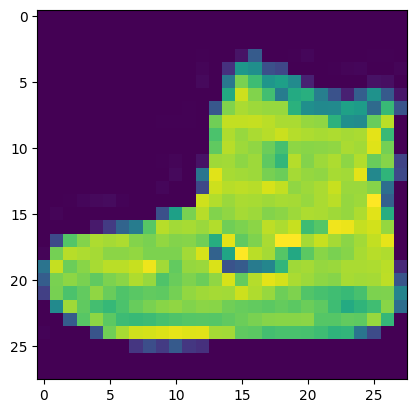

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

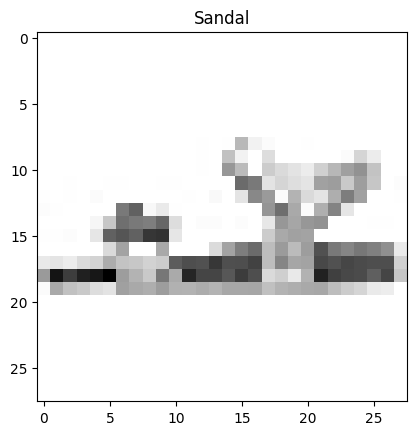

In [ ]:
index_picture = 59999
plt.imshow(train_data[index_picture], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_picture]]);

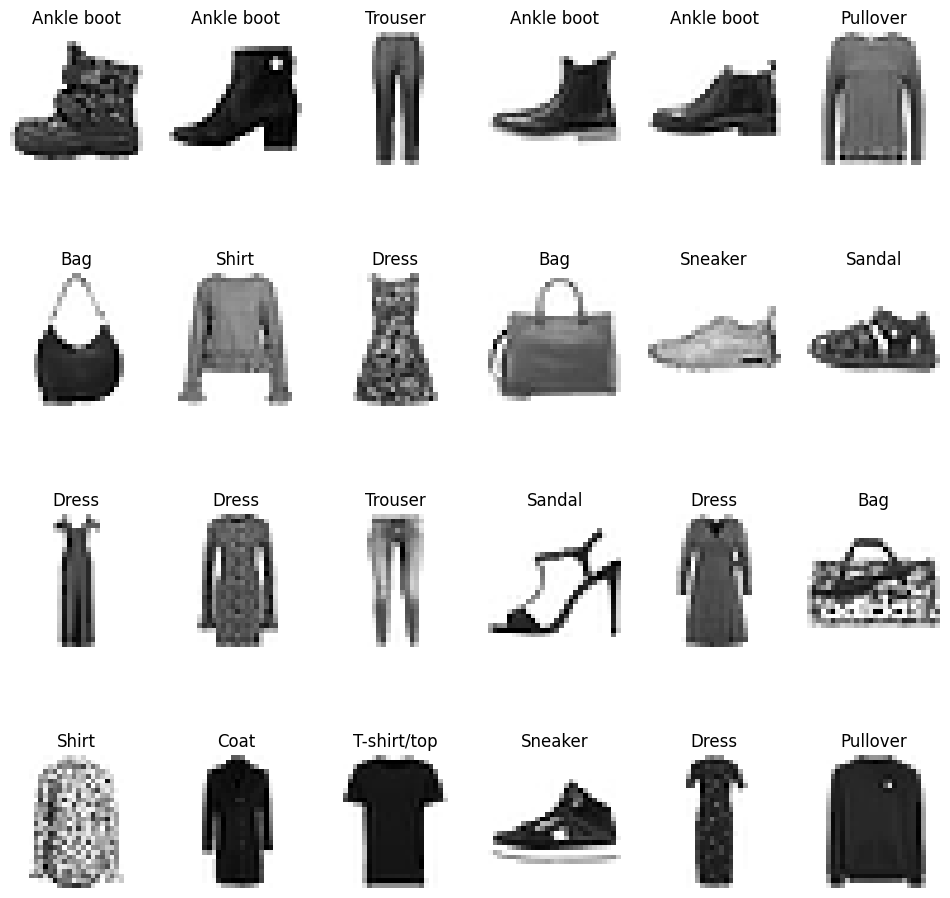

In [ ]:
import random
plt.figure(figsize=(12, 12))
for i in range(24):
  ax = plt.subplot(4, 6, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False);

### Building a multi-class classification model

In [ ]:
# Our data needs to be flattened (from (28, 28) to (None, 784)) ---> long vector
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# hint: in multiclass classification labels:
### tf.keras.losses.CategoricalCrossentropy() ---> use for one-hot encoding
### tf.keras.losses.SparseCategoricalCrossentropy() ---> use for integer numbers

In [ ]:
# model_1
# One-hot encoding for labels

tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(name="model_1")
model_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_1.add(tf.keras.layers.Dense(4, activation="relu"))
model_1.add(tf.keras.layers.Dense(4, activation="relu"))
model_1.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_1.fit(train_data,
                      tf.one_hot(train_labels, depth=10),
                      epochs=10,
                      verbose=1,
                      validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

# 4. Evaluate the model
model_1.evaluate(test_data, tf.one_hot(test_labels, depth=10))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9890 - accuracy: 0.2547 - val_loss: 1.4646 - val_accuracy: 0.3794
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3602 - accuracy: 0.4484 - val_loss: 1.3046 - val_accuracy: 0.4748
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2435 - accuracy: 0.5008 - val_loss: 1.2255 - val_accuracy: 0.4910
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1662 - accuracy: 0.5378 - val_loss: 1.0247 - val_accuracy: 0.6178
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9576 - accuracy: 0.6228 - val_loss: 0.9531 - val_accuracy: 0.6353
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9081 - accuracy: 0.6504 - val_loss: 0.8941 - val_accuracy: 0.6867
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8623 - accuracy: 0.6905 - val_loss: 0.8812 - val_accuracy:

[0.7718649506568909, 0.7340999841690063]

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Neural networks prefer data to be scaled (normal or standard) the data between 0 & 1
# Normalization

train_data_norm = train_data / float(train_data.max())
test_data_norm = test_data / float(test_data.max())

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# model_2
# Normalized model_1

tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential(name="model_2")
model_2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
norm_history = model_2.fit(train_data_norm,
                      train_labels,
                      epochs=10,
                      verbose=1,
                      validation_data=(test_data_norm, test_labels))

# 4. Evaluate the model
model_2.evaluate(test_data_norm, test_labels)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9832 - accuracy: 0.6474 - val_loss: 0.7325 - val_accuracy: 0.7258
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6618 - accuracy: 0.7620 - val_loss: 0.6611 - val_accuracy: 0.7639
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5935 - accuracy: 0.7932 - val_loss: 0.6080 - val_accuracy: 0.7891
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5591 - accuracy: 0.8082 - val_loss: 0.5957 - val_accuracy: 0.7950
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5427 - accuracy: 0.8139 - val_loss: 0.5943 - val_accuracy: 0.7965
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5307 - accuracy: 0.8171 - val_loss: 0.5634 - val_accuracy: 0.8026
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5234 - accuracy: 0.8203 - val_loss: 0.5889 - val_accuracy:

[115.56441497802734, 0.7364000082015991]

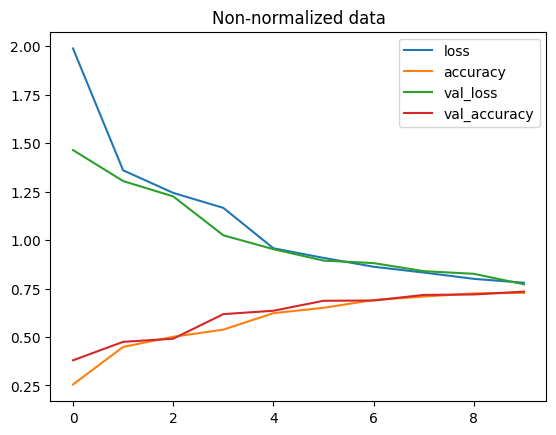

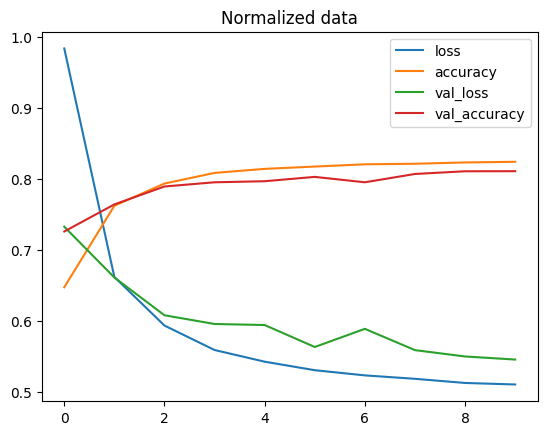

In [ ]:
import pandas as pd

# Plot non-norm data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot norm data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

#### Finding the ideal learning rate

In [ ]:
# model_3
# Based on model_2 with 40 epochs with the ideal learning rate

tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(name="model_3")
model_3.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_3.add(tf.keras.layers.Dense(4, activation="relu"))
model_3.add(tf.keras.layers.Dense(4, activation="relu"))
model_3.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# 3. Fit the model
find_lr_history = model_3.fit(train_data_norm,
                      train_labels,
                      epochs=40,
                      verbose=1,
                      validation_data=(test_data_norm, test_labels),
                      callbacks=[lr_scheduler])

# 4. Evaluate the model
model_3.evaluate(test_data_norm, test_labels)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8954 - accuracy: 0.6844 - val_loss: 0.6617 - val_accuracy: 0.7725 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6099 - accuracy: 0.7886 - val_loss: 0.6418 - val_accuracy: 0.7775 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5717 - accuracy: 0.8017 - val_loss: 0.6068 - val_accuracy: 0.7907 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5527 - accuracy: 0.8077 - val_loss: 0.5837 - val_accuracy: 0.8007 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5416 - accuracy: 0.8102 - val_loss: 0.5810 - val_accuracy: 0.8036 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5341 - accuracy: 0.8128 - val_loss: 0.5930 - val_accuracy: 0.7958 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

[164.69805908203125, 0.3781999945640564]

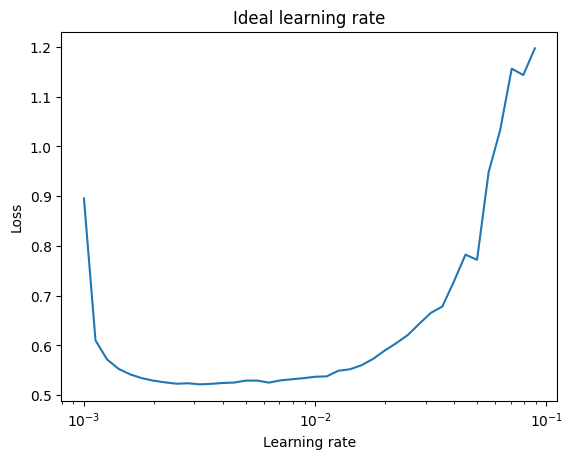

In [ ]:
# Plot the learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Ideal learning rate")
plt.show()

In [ ]:
# model_4
# With ideal learning rate = 0.001 as Adam's defualt learning rate

tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(name="model_4")
model_4.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_4.add(tf.keras.layers.Dense(4, activation="relu"))
model_4.add(tf.keras.layers.Dense(4, activation="relu"))
model_4.add(tf.keras.layers.Dense(len(class_names), activation="softmax"))

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_14_history = model_4.fit(train_data_norm,
                      train_labels,
                      epochs=20,
                      verbose=1,
                      validation_data=(test_data_norm, test_labels))

# 4. Evaluate the model
model_4.evaluate(test_data_norm, test_labels)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3225 - accuracy: 0.4893 - val_loss: 0.8064 - val_accuracy: 0.7177
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7010 - accuracy: 0.7571 - val_loss: 0.6724 - val_accuracy: 0.7670
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6274 - accuracy: 0.7828 - val_loss: 0.6440 - val_accuracy: 0.7729
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6026 - accuracy: 0.7912 - val_loss: 0.6256 - val_accuracy: 0.7807
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5911 - accuracy: 0.7937 - val_loss: 0.6439 - val_accuracy: 0.7757
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5808 - accuracy: 0.7971 - val_loss: 0.6471 - val_accuracy: 0.7668
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5758 - accuracy: 0.7995 - val_loss: 0.6122 - val_accuracy:

[0.5867227911949158, 0.7930999994277954]

### Evaluate the model

In [ ]:
y_prob = model_4.predict(test_data_norm) # prediction probabilities
y_prob[0], tf.argmax(y_prob[0]), class_names[tf.argmax(y_prob[0])]

313/313 [==============================] - 1s 2ms/step


(array([2.2253621e-04, 1.2447923e-10, 2.5808264e-05, 2.6326549e-07,
        1.3635705e-08, 4.8012778e-01, 6.6421897e-04, 5.8049552e-02,
        8.1634326e-03, 4.5274636e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred[0]

5

In [ ]:
# Confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_pred)

array([[701,   0,  10, 125,  12,   0, 129,   0,  23,   0],
       [  1, 941,   3,  43,   9,   0,   2,   0,   1,   0],
       [  8,   1, 468,  35, 267,   0, 218,   0,   3,   0],
       [ 24,  18,  17, 846,  40,   0,  48,   0,   7,   0],
       [  0,   9,  56,  37, 804,   0,  88,   0,   6,   0],
       [  0,   0,   0,   1,   0, 912,   0,  53,   7,  27],
       [124,   2,  64,  83, 166,   0, 534,   0,  27,   0],
       [  0,   0,   0,   0,   0,  58,   0, 912,   0,  30],
       [  3,   0,   1,  11,   5,  14,  58,   4, 903,   1],
       [  3,   0,   0,   0,   0,  34,   0,  51,   2, 910]])

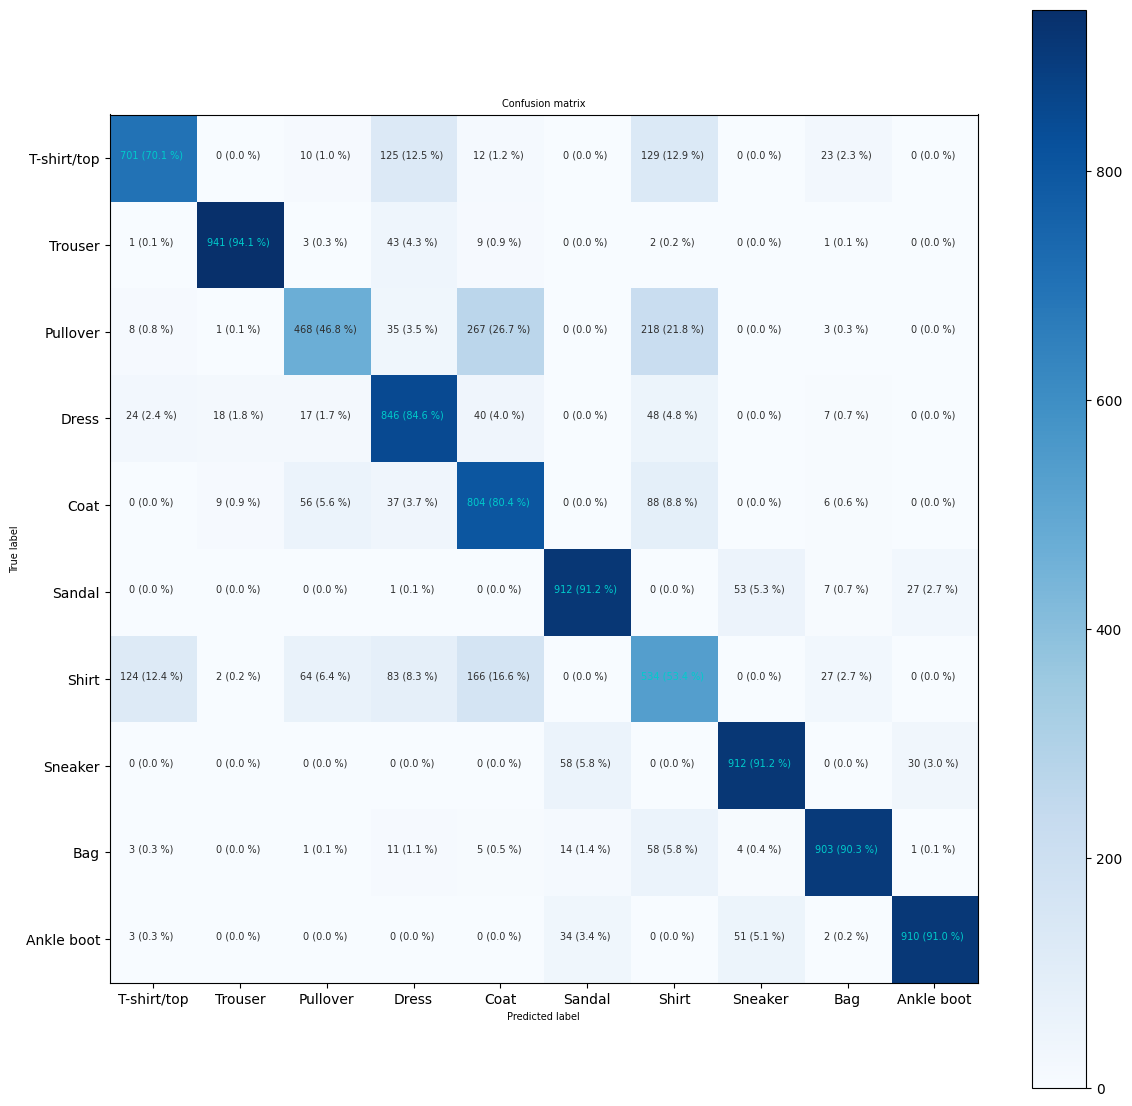

In [ ]:
# Plot confusion_matrix
plot_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      text_size=7,
                      figsize=(14, 14))

#### Create an function for:

* Plot a random image
* Make prediction on said image
* Label the plot with the truth label and predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """"
  Pick an image, plot it and label it
  """
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
               color=color)



1/1 [==============================] - 0s 16ms/step


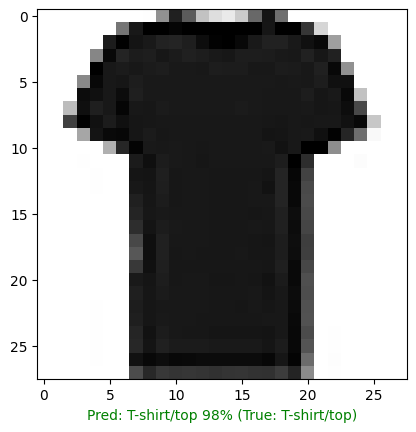

In [ ]:
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## Patterns are our model learning

In [ ]:
# Layers
model_4.layers

In [ ]:
model_4.layers[1]

In [ ]:
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[-0.91045225,  0.03527914,  0.645672  ,  0.74947417],
        [-0.9602319 , -0.08060642,  0.7591512 ,  0.49555376],
        [-0.7558911 , -0.07164262,  0.89282066,  0.72437316],
        ...,
        [-0.25483093,  0.07472144, -0.01350528,  0.12296258],
        [-0.13445412, -0.089389  , -0.79964256, -0.08776397],
        [-0.3290255 , -0.00349946,  0.23372017,  0.38191977]],
       dtype=float32),
 (784, 4))

In [ ]:
biases, biases.shape

(array([ 1.9351891 , -0.01784054,  0.18358666,  1.4478935 ], dtype=float32),
 (4,))

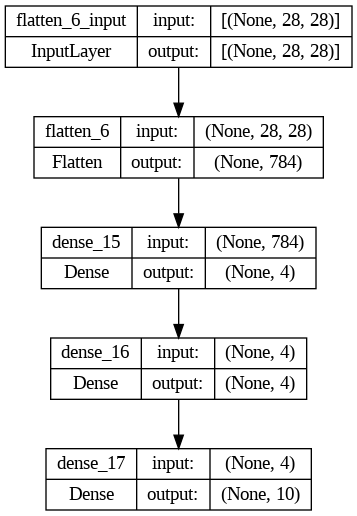

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)